In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data_path = "/home/roseyu/Python/TensorCompress/experiments/log/tensor_rnn/"
max_epoch = 5 


file_name = "predict_epoch_10.npy"
[ test_true, test_predict] = np.load(data_path + file_name)

y_true = train_true
y_predict = train_predict
print("true shape", len(y_true))

print("predict shape",len(y_predict))
print(len(y_predict[0]))

plt.figure(1, figsize=(10,6))
plt.subplot(5,1,1)
x = np.linspace(1, 100, num= 100)
plt.title('Ground Truth')
plt.plot(x, y_true[100:200],'b')
plt.subplot(212)
for epoch in range(1,max_epoch):

    file_name = "predict_epoch_"+str(epoch)+"0.npy"
    test_true, test_predict= np.load(data_path + file_name)
    y_true = train_true
    y_predict = train_predict

    #plt.plot(x,y_true[0:100],'b--', x, y_predict[0:100], 'ro' )
    plt.subplot(5,1,epoch+1)
    plt.plot(x, y_predict[100:200],'r')
    plt.title('Epoch '+str(epoch)+"0")
    plt.ylim([0,1])
plt.tight_layout()

ValueError: too many values to unpack

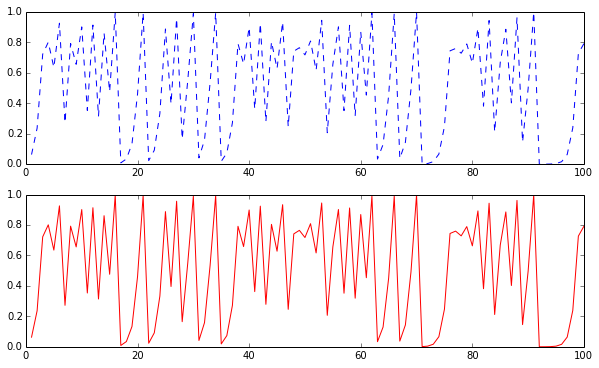

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data_path = "/home/roseyu/Python/TensorCompress/experiments/log/tensor_rnn/"
max_epoch = 5 


def reshape_pred(pred, batch_size):
    """reshape into batch_size x num_steps,  concatenate on num_stesp"""
    num_step = 12
    epoch_size = len(pred)
    pred_list = []
    for epoch in range(epoch_size):
        pred_reshape = np.reshape(pred[epoch], (batch_size, num_step))
        pred_list.append(pred_reshape)

    pred_out = np.concatenate(pred_list, axis = 1)
    return pred_out.flatten()
        
    
    
file_name = "predict.npy"
test_true, test_pred= np.load(data_path + file_name)
# rescale
test_pred =(test_pred-np.mean(test_pred))*(-692)+ np.mean(test_true)

plt.figure(1, figsize=(10,6))

x = np.linspace(1, 100, num= 100)
plt.title('Ground Truth')
plt.subplot(211)
plt.plot(x,test_true[200:300],'b--')
plt.subplot(212)
plt.plot(x,test_pred[200:300], 'r-' )